In [1]:
import requests
import sys
import pandas as pd
import numpy as np
from scipy import sparse
from io import StringIO
import networkscience as ns
from matplotlib import pyplot as plt
import seaborn as sns

In [57]:
mobility_df = pd.read_csv('erasmus_data_clean.csv', sep=';',low_memory=False, header=0)
for i, name in enumerate(mobility_df.columns):
    print(i, name)

0 Sending Organization
1 Receiving Organization
2 Participants
3 Field of Education
4 Sending Country Code
5 Receiving Country Code


In [58]:
df_w_fields = mobility_df.copy()

In [4]:
mobility_df

,Sending Organization,Receiving Organization,Participants,Field of Education,Sending Country Code,Receiving Country Code
0,VORARLBERGER LANDESKONSERVATORIUM,LUNDS UNIVERSITET,1,music and performing arts,AT,SE
1,NATIONAL MINING UNIVERSITY,MONTANUNIVERSITAT LEOBEN,1,environmental protection technology,UA,AT
2,NATIONAL MINING UNIVERSITY,MONTANUNIVERSITAT LEOBEN,1,electronics and automation,UA,AT
3,NATIONAL MINING UNIVERSITY,MONTANUNIVERSITAT LEOBEN,1,mechanics and metal trades,UA,AT
4,MONTANUNIVERSITAT LEOBEN,THE NATIONAL MINERAL RESOURCES UNIVERSITY (THE...,1,mining and extraction,AT,RU
...,...,...,...,...,...,...
234603,UNIVERSITY COLLEGE LONDON,FEDERAL STATE AUTONOMOUS EDUCATIONAL INSTITUTI...,1,political sciences and civics,UK,RU
234604,UNIVERSITY COLLEGE LONDON,FEDERAL STATE AUTONOMOUS EDUCATIONAL INSTITUTI...,1,political sciences and civics,UK,RU
234605,FEDERAL STATE AUTONOMOUS EDUCATIONAL INSTITUTI...,UNIVERSITY COLLEGE LONDON,1,economics,RU,UK
234606,UNIVERSITY COLLEGE LONDON,THE HEBREW UNIVERSITY OF JERUSALEM,1,arts and humanities,UK,IL


In [5]:
print('Number of Receiving Universities: ',(mobility_df['Receiving Organization'].nunique()))
print('Number of Sending Universities: ',(mobility_df['Sending Organization'].nunique()))

Number of Receiving Universities:  3668
Number of Sending Universities:  4189


In [6]:
field_df = mobility_df.iloc[:,[3,2]].groupby(['Field of Education']).sum()
field_df.sort_values(by='Participants', inplace=True)
field_df

,Participants
Field of Education,
community sanitation,4
hygiene and occupational health services,8
care of the elderly and of disabled adults,10
hair and beauty services,11
domestic services,19
...,...
political sciences and civics,10388
engineering and engineering trades,12829
law,14242


In [25]:
node_df = mobility_df.iloc[:, [0,4]].groupby(['Sending Organization', 'Sending Country Code']).sum()
node_df.to_csv('nodes_universities.csv')
mob_df = mobility_df.rename({'Sending Organization': 'source','Receiving Organization': 'target', 'Participants':'weight'},axis=1)
edges_df = mob_df.iloc[:,[0,1,2] ].groupby(['source', 'target']).sum()
edges_df
edges_df.to_csv('edges_universities.csv')
node_df

,
Sending Organization,Sending Country Code
"""ADA"" UNIVERSITY",AZ
"""FINANCIAL ACADEMY""",KZ
"""KATHOLISCHE STIFTUNGSHOCHSCHULE MÜNCHEN"" HOCHSCHULE FÜR ANGEWANDTE WISSENSCHAFTEN DER KIRCHLICHEN STIFTUNG DES ÖFFENTLICHEN RECHTS ""KATHOLISCHE BILDUNGSSTÄTTEN FÜR SOZIALBERUFE IN BAYERN""",DE
"""KROK"" UNIVERSITY",UA
''FRENCH UNIVERSITY IN ARMENIA'' FOUNDATION,AM
...,...
ÜSKÜDAR UNIVERSITY,TR
РОССИЙСКАЯ АКАДЕМИЯ НАРОДНОГО ХОЗЯЙСТВА И ГОСУДАРСТВЕННОЙ СЛУЖБЫ ПРИ ПРЕЗИДЕНТЕ РОССИЙСКОЙ ФЕДЕРАЦИИ,RU
РОССИЙСКИЙ ГОСУДАРСТВЕННЫЙ АГРАРНЫЙ УНИВЕРСИТЕТ - МСХА ИМЕНИ К.А. ТИМИРЯЗЕВА,RU


In [7]:
nodes = np.array(list(set.union(set(mobility_df.loc[:, mobility_df.columns[0]]), set(mobility_df.loc[:, mobility_df.columns[1]]))))
node_position = {}
for i, name in enumerate(nodes):
    node_position[name] = i
nodes_df = pd.DataFrame({'Nodes': nodes})
mobility_df['SendId'] = (np.array(list(map(lambda x: node_position[x], mobility_df['Sending Organization']))))
mobility_df['RecId']= (np.array(list(map(lambda x: node_position[x], mobility_df['Receiving Organization']))))
# Adjacency matrix
adj_matrix_crs = sparse.csr_matrix((nodes.size, nodes.size),dtype=int)
adj_matrix_csc = sparse.csc_matrix((nodes.size, nodes.size),dtype=int)

In [8]:
mobility_serie = mobility_df.groupby(['SendId', 'RecId']).sum()
row = np.array(mobility_serie.index.get_level_values(1).tolist())
col = np.array(mobility_serie.index.get_level_values(0).tolist())
val = mobility_serie.values
adj_matrix_crs = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))

# cercasi 70 Gb di ram, no perditempo
# ns.visualize_adj(adj_matrix_crs)

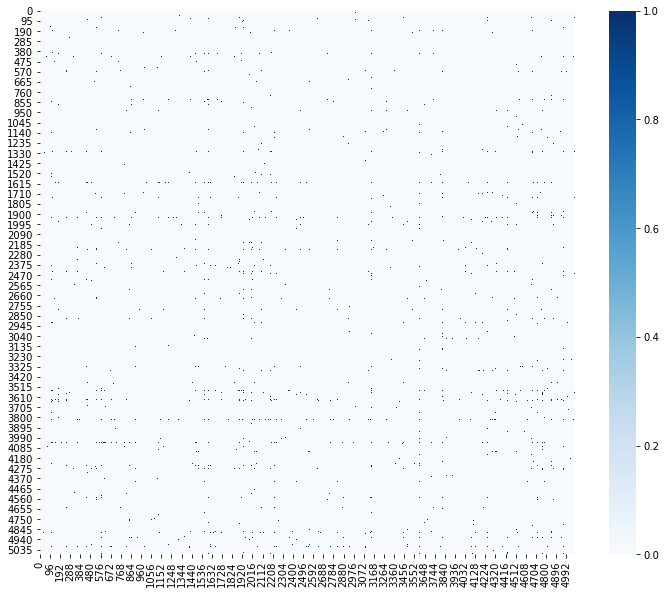

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
a_adj = adj_matrix_crs.toarray()
a_adj[a_adj>1] = 1
sns.heatmap(a_adj, cmap="Blues", ax=ax)
plt.show()

In [9]:
mobility_df.rename({'Sending Organization': 'source','Receiving Organization': 'target', 'Participants':'weight'},axis=1, inplace=True)
adj_matrix_crs, mobility_df, nodes_df = ns.keep_giant(ns.find_components(adj_matrix_crs, nodes_df), mobility_df)

### Degree distribution

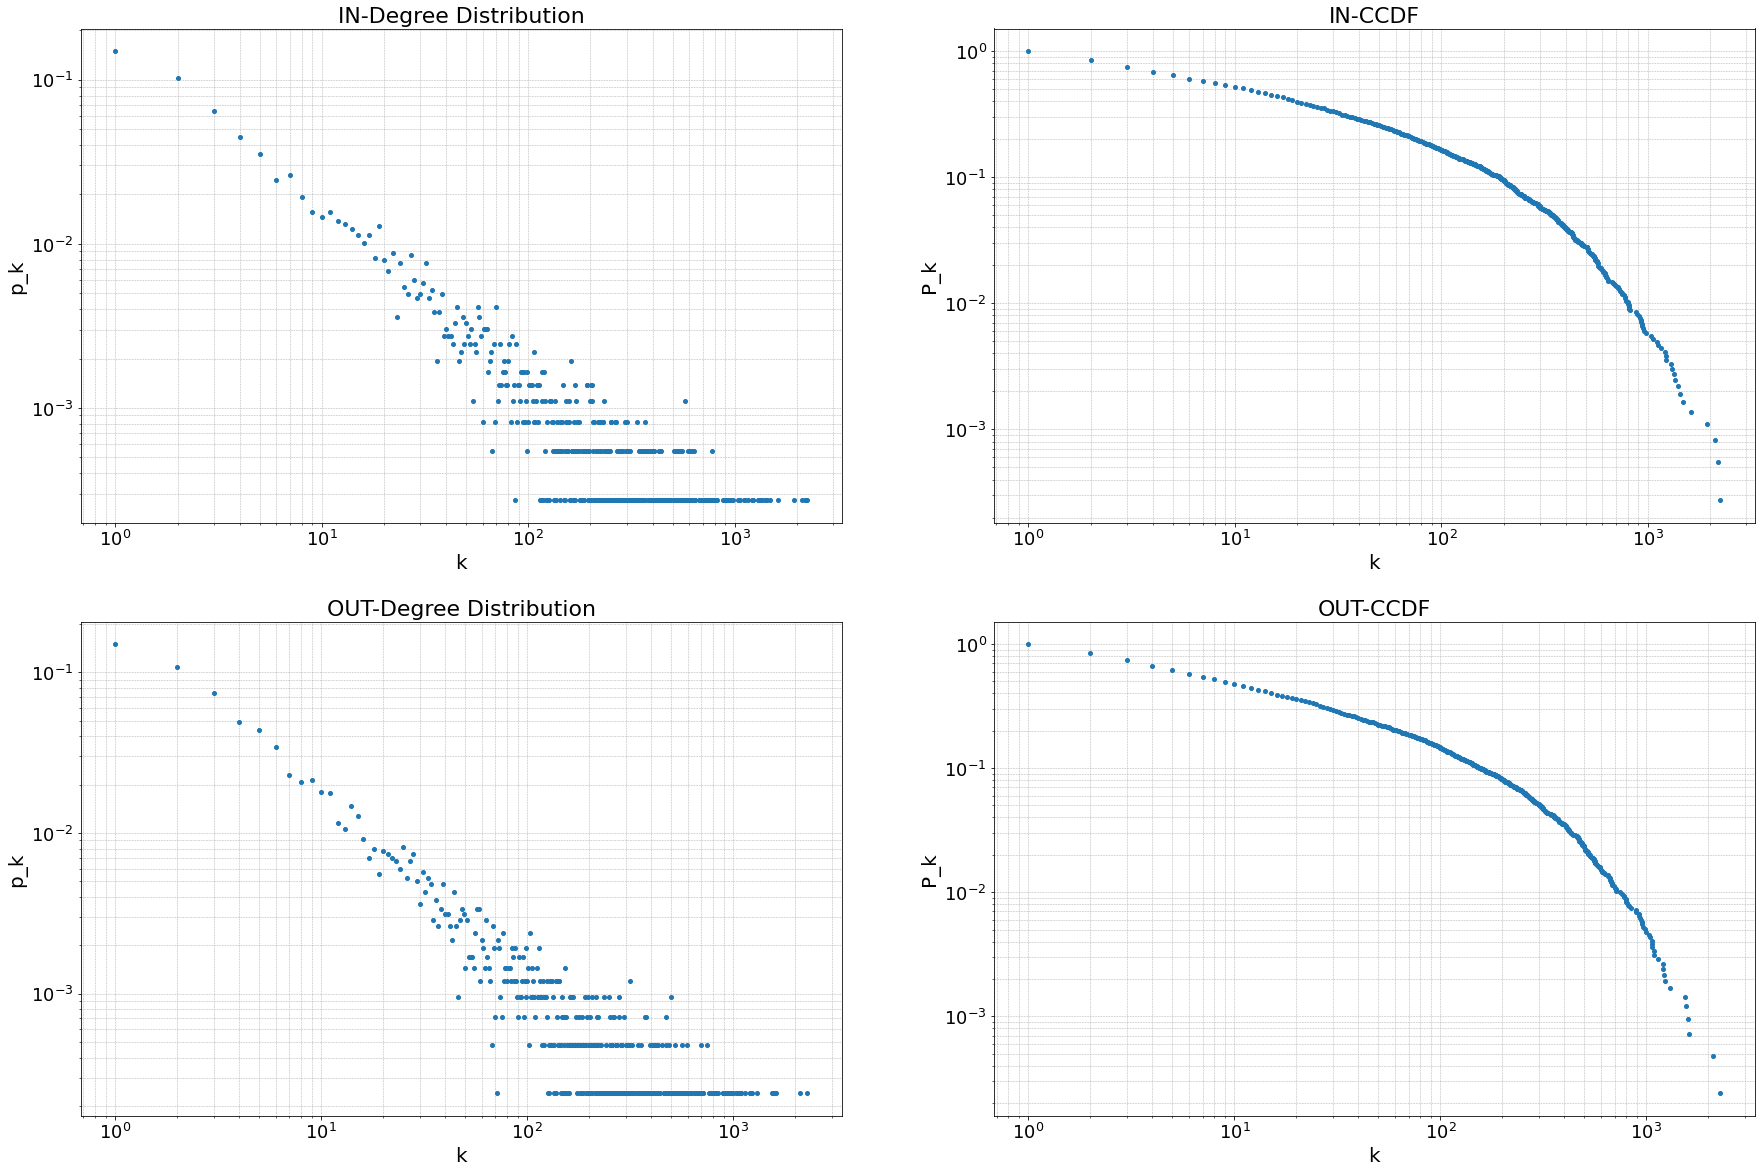

Top 10 for in degree


,Nodes,in degree
4111,UNIVERSITAT DE VALENCIA,2239
1662,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,2181
2863,UNIVERSIDADE DE LISBOA,2118
3110,UNIVERSIDAD DE GRANADA,1934
1507,UNIVERSIDAD COMPLUTENSE DE MADRID,1615
998,UNIVERZA V LJUBLJANI,1483
3428,UNIVERSITAT POLITECNICA DE VALENCIA,1436
2420,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,1406
3420,UNIVERSIDAD DE SEVILLA,1352
3147,KATHOLIEKE UNIVERSITEIT LEUVEN,1340


Top 10 for out degree


,Nodes,out degree
1662,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,2280
3110,UNIVERSIDAD DE GRANADA,2114
4111,UNIVERSITAT DE VALENCIA,1604
1507,UNIVERSIDAD COMPLUTENSE DE MADRID,1590
679,UNIVERSITA DEGLI STUDI DI PADOVA,1563
1723,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,1544
3769,UNIVERSITA DEGLI STUDI DI TORINO,1299
2863,UNIVERSIDADE DE LISBOA,1230
3147,KATHOLIEKE UNIVERSITEIT LEUVEN,1218
601,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,1206


In [10]:
scores = ns.degree_disribution(adj_matrix_crs, nodes_df, print_graph=True)
ns.display_top_n(scores, 10, 'in degree')
ns.display_top_n(scores, 10, 'out degree')

### HITS (NetworkX)

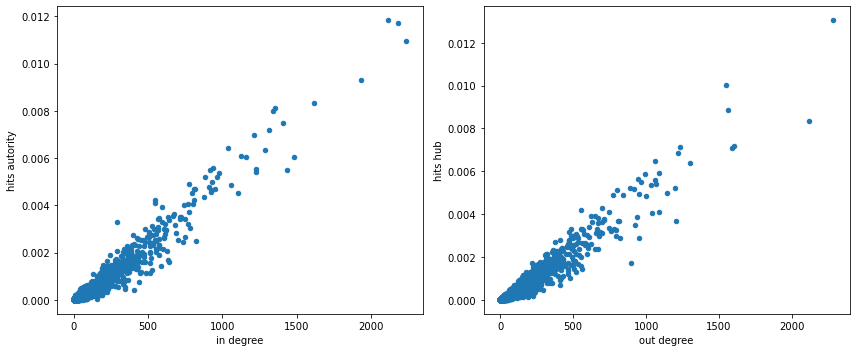

Top 10 for hits hub


,Nodes,hits hub
1662,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.013047
1723,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.010031
679,UNIVERSITA DEGLI STUDI DI PADOVA,0.008867
3110,UNIVERSIDAD DE GRANADA,0.008333
4111,UNIVERSITAT DE VALENCIA,0.007195
2863,UNIVERSIDADE DE LISBOA,0.007115
1507,UNIVERSIDAD COMPLUTENSE DE MADRID,0.007102
3147,KATHOLIEKE UNIVERSITEIT LEUVEN,0.006871
2719,TECHNISCHE UNIVERSITAET MUENCHEN,0.006476
3769,UNIVERSITA DEGLI STUDI DI TORINO,0.006369


Top 10 for hits autority


,Nodes,hits autority
2863,UNIVERSIDADE DE LISBOA,0.011827
1662,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.011717
4111,UNIVERSITAT DE VALENCIA,0.010963
3110,UNIVERSIDAD DE GRANADA,0.009295
1507,UNIVERSIDAD COMPLUTENSE DE MADRID,0.008322
3420,UNIVERSIDAD DE SEVILLA,0.008102
3147,KATHOLIEKE UNIVERSITEIT LEUVEN,0.007990
2420,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,0.007498
2291,UNIVERZITA KARLOVA,0.007183
4142,UNIVERSITAT DE BARCELONA,0.006963


In [11]:
df = ns.hits_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'hits hub')
ns.display_top_n(scores, 10, 'hits autority')

### PageRank (NetworkX)

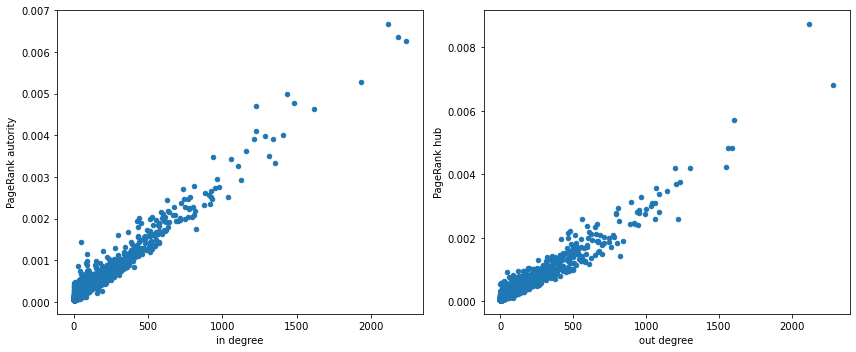

Top 10 for PageRank hub


,Nodes,PageRank hub
3110,UNIVERSIDAD DE GRANADA,0.008725
1662,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006796
4111,UNIVERSITAT DE VALENCIA,0.005714
1507,UNIVERSIDAD COMPLUTENSE DE MADRID,0.004827
679,UNIVERSITA DEGLI STUDI DI PADOVA,0.004826
1723,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.004224
1091,UNIVERSIDAD POLITECNICA DE MADRID,0.004187
3769,UNIVERSITA DEGLI STUDI DI TORINO,0.004185
2863,UNIVERSIDADE DE LISBOA,0.003747
601,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,0.003685


Top 10 for PageRank autority


,Nodes,PageRank autority
2863,UNIVERSIDADE DE LISBOA,0.006671
1662,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006370
4111,UNIVERSITAT DE VALENCIA,0.006260
3110,UNIVERSIDAD DE GRANADA,0.005291
3428,UNIVERSITAT POLITECNICA DE VALENCIA,0.004998
998,UNIVERZA V LJUBLJANI,0.004764
882,POLITECNICO DI MILANO,0.004715
1507,UNIVERSIDAD COMPLUTENSE DE MADRID,0.004639
679,UNIVERSITA DEGLI STUDI DI PADOVA,0.004098
2420,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,0.004002


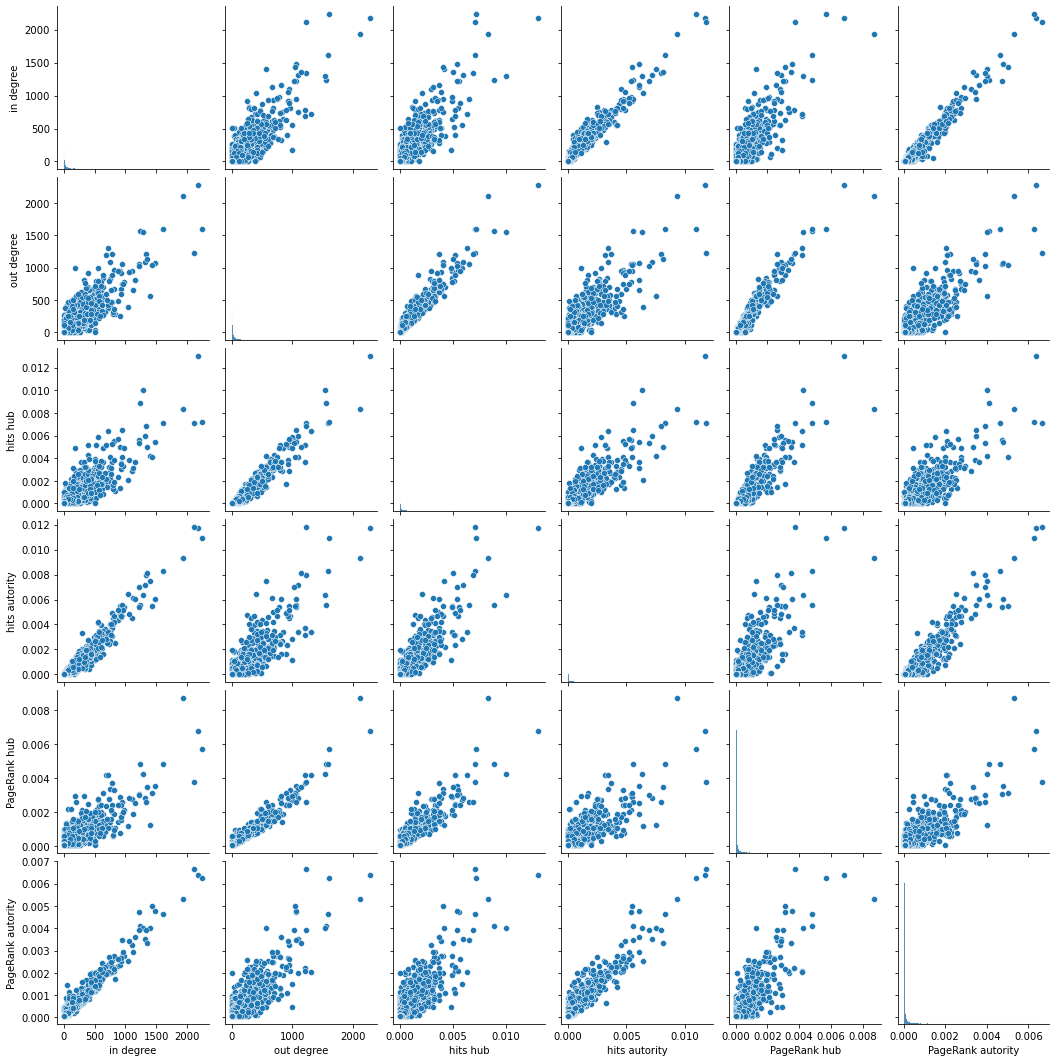

In [12]:
df = ns.pagerank_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'PageRank hub')
ns.display_top_n(scores, 10, 'PageRank autority')
# ci vuole troppo a farlo
sns.pairplot(scores[['in degree', 'out degree',  'hits hub',
       'hits autority', 'PageRank hub', 'PageRank autority']])
plt.show()
# from IPython.display import Image
# Image('pairplot_score.png',)

### Assortativity

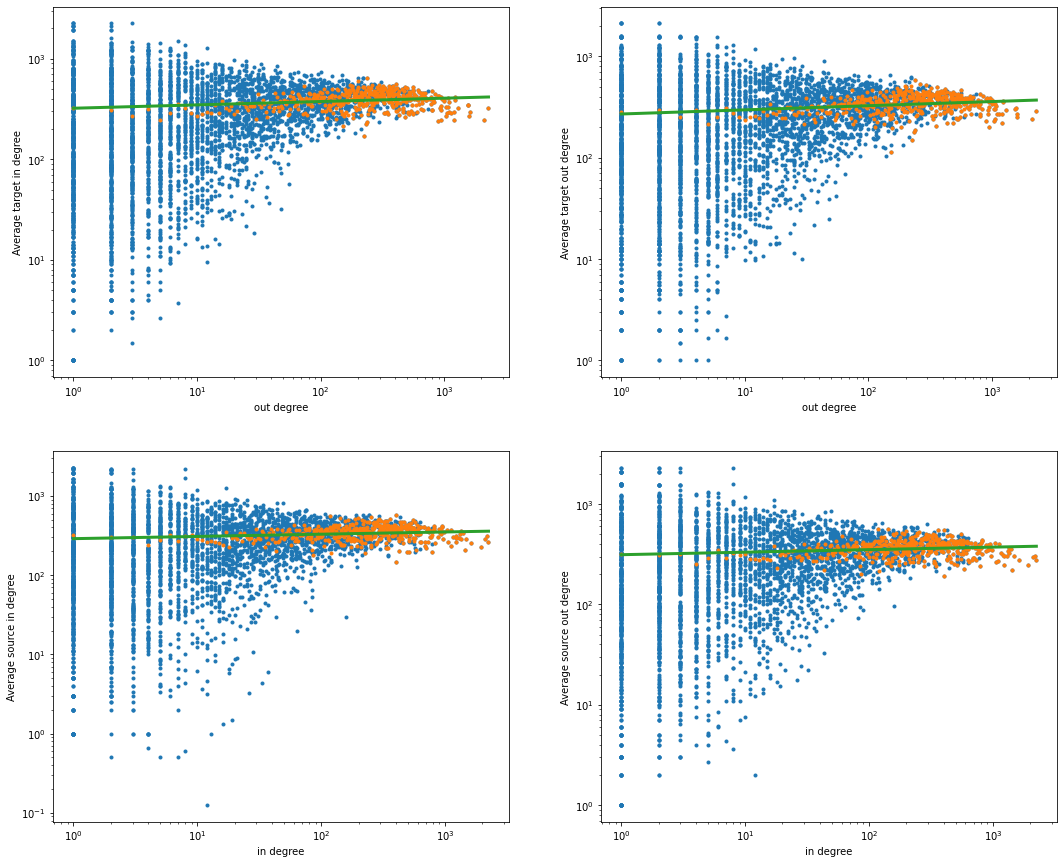

(0.03328336726379369,
 0.04089504568744987,
 0.028140315968197615,
 0.025142959029358692)

In [14]:
edges = mobility_df.copy()
ns.assortativity_calc(edges, adj_matrix_crs, nodes_df, True)

### Number of fields of education per university

In [59]:
field_dic = {'Education': ['training for pre-school teachers','teacher training without subject specialization','teacher training with subject specialization','education','education science'],
                'Arts and humanities': ['handicrafts','religion and theology','philosophy and ethics','music and performing arts','literature and linguistics','languages','language acquisition','humanities (except languages)','history and archaeology','fine arts','fashion, interior and industrial design','arts', 'arts and humanities', 'audio-visual techniques and media production'],
                'Social sciences, journalism and information': ['sociology and cultural studies','social sciences, journalism and information','social and behavioural sciences','psychology','political sciences and civics','library, information and archival studies','journalism and reporting','journalism and information','economics'],
                'Business, administration and law': ['work skills','wholesale and retail sales','marketing and advertising','management and administration','law','finance, banking and insurance','business, administration and law', 'business and administration', 'accounting and taxation'],
                'Natural sciences, mathematics and statistics': ['statistics','physics','physical sciences','natural sciences, mathematics and statistics','natural environments and wildlife','mathematics and statistics','mathematics','environmental sciences','environment','earth sciences','chemistry', 'biochemistry', 'biological and related sciences', 'biology'],
                'Information and Communication Technologies (ICTs)': ['software and applications development and analysis','information and communication technologies (icts)','database and network design and administration', 'computer use'],
                'Engineering, manufacturing and construction': ['textiles (clothes, footwear and leather)','motor vehicles, ships and aircraft','mining and extraction','mechanics and metal trades','materials (glass, paper, plastic and wood)','manufacturing and processing','food processing','environmental protection technology','electronics and automation','engineering and engineering trades','engineering, manufacturing and construction','electricity and energy','chemical engineering and processes', 'architecture and construction', 'architecture and town planning', 'building and civil engineering'],
                'Agriculture, forestry, fisheries and veterinary': ['veterinary','forestry','fisheries','crop and livestock production', 'agriculture', 'agriculture, forestry, fisheries and veterinary'],
                'Health and welfare': ['welfare','traditional and complementary medicine and therapy','therapy and rehabilitation','pharmacy','nursing and midwifery','medicine','medical diagnostic and treatment technology','hygiene and occupational health services','horticulture','health and welfare','health','dental studies', 'child care and youth services', 'care of the elderly and of disabled adults'],
                'Services': ['travel, tourism and leisure','transport services','sports','social work and counselling','services','security services','secretarial and office work','protection of persons and property','personal services','occupational health and safety','military and defence','hotel, restaurants and catering','hair and beauty services','domestic services','community sanitation']
                }
                
def standard_field(field):
    for f in field_dic.keys():
        if field in field_dic[f]:
            return f

df_w_fields['Field of Education'] = df_w_fields['Field of Education'].apply(standard_field)

In [60]:
Fields_serie_s = df_w_fields.groupby('Sending Organization')['Field of Education'].unique()
Fields_serie_r = df_w_fields.groupby('Receiving Organization')['Field of Education'].unique()
d = {'sending': Fields_serie_s, 'receiving': Fields_serie_r}
Fields_df = pd.DataFrame(d)
Fields_df


,sending,receiving
"""ADA"" UNIVERSITY","[Social sciences, journalism and information, ...","[Social sciences, journalism and information, ..."
"""FINANCIAL ACADEMY""","[Social sciences, journalism and information]",NaN
"""KATHOLISCHE STIFTUNGSHOCHSCHULE MÜNCHEN"" HOCHSCHULE FÜR ANGEWANDTE WISSENSCHAFTEN DER KIRCHLICHEN STIFTUNG DES ÖFFENTLICHEN RECHTS ""KATHOLISCHE BILDUNGSSTÄTTEN FÜR SOZIALBERUFE IN BAYERN""","[Health and welfare, Services]","[Education, Services, Health and welfare]"
"""KROK"" UNIVERSITY","[Business, administration and law]","[Business, administration and law]"
''FRENCH UNIVERSITY IN ARMENIA'' FOUNDATION,"[Social sciences, journalism and information, ...",NaN
...,...,...
ÜSKÜDAR UNIVERSITY,"[Social sciences, journalism and information, ...","[Health and welfare, Social sciences, journali..."
РОССИЙСКАЯ АКАДЕМИЯ НАРОДНОГО ХОЗЯЙСТВА И ГОСУДАРСТВЕННОЙ СЛУЖБЫ ПРИ ПРЕЗИДЕНТЕ РОССИЙСКОЙ ФЕДЕРАЦИИ,"[Social sciences, journalism and information]",NaN
РОССИЙСКИЙ ГОСУДАРСТВЕННЫЙ АГРАРНЫЙ УНИВЕРСИТЕТ - МСХА ИМЕНИ К.А. ТИМИРЯЗЕВА,"[Social sciences, journalism and information]",[Services]
УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ УНИВЕРСИТЕТ,"[Social sciences, journalism and information]",NaN


In [61]:
Fields_df = Fields_df.fillna(0) 
#se vi viene in mente un modo migliore per togliere gli NaN e fare l'unione dopo siete i benvenuti
#(non si può fare .fillna([]) purtroppo)
Fields_df['N Fields'] = 0
for i in range(Fields_df.shape[0]):
    s = set() if type(Fields_df['sending'][i])==int else set(Fields_df['sending'][i])
    r = set() if type(Fields_df['receiving'][i])==int else set(Fields_df['receiving'][i])
    Fields_df['N Fields'][i] = len(s | r)
Fields_df['N Fields'].sort_values()

<ipython-input-61-5216e527d0ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fields_df['N Fields'][i] = len(s | r)


MENOFIA UNIVERSITY                        1
LYCEE DES METIERS BOULLE ESAA             1
LYCEE GENERAL TECHNIQUE GASTON BERGER     1
LYCEE LOUISE MICHEL                       1
LYCEE POLYVALENT GEORGES FRECHE           1
                                         ..
UNIVERSITA DEGLI STUDI DI CAGLIARI       10
LINNEUNIVERSITETET                       10
UNIVERSITY OF WOLVERHAMPTON              10
ESKISEHIR OSMANGAZI UNIVERSITESI         10
UNIVERSITY OF NEWCASTLE UPON TYNE        10
Name: N Fields, Length: 5079, dtype: int64

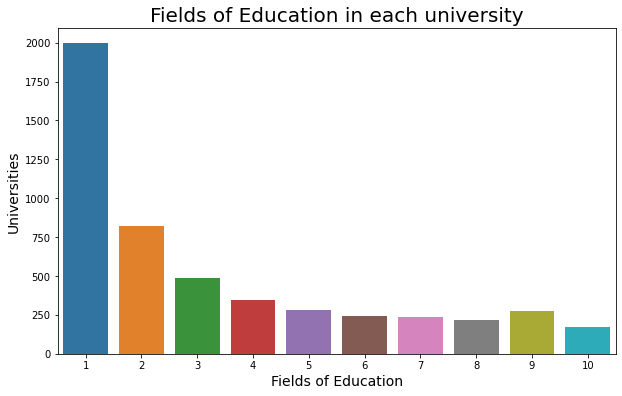

In [62]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x=Fields_df['N Fields'])
plt.xlabel('Fields of Education', size=14)
plt.ylabel('Universities', size=14)
plt.title('Fields of Education in each university', size=20)
plt.show()


In [63]:
Fields_df.drop(['sending', 'receiving'], axis=1, inplace=True)
Fields_df['Nodes'] = Fields_df.index

In [64]:
scores = pd.merge(scores, Fields_df, how='left', on='Nodes')
scores[['Nodes', 'N Fields']].sort_values(by='N Fields', ascending=False) # just to double check

,Nodes,N Fields
679,UNIVERSITA DEGLI STUDI DI PADOVA,10
1161,CHRISTIAN-ALBRECHTS-UNIVERSITAET ZU KIEL,10
1946,UNIVERSIDAD DE ZARAGOZA,10
1945,HELSINGIN YLIOPISTO,10
3420,UNIVERSIDAD DE SEVILLA,10
...,...,...
2387,SCUOLA SUPERIORE PER MEDIATORI LINGUISTICI,1
2388,ODESSA REGIONAL INSTITUTE FOR PUBLIC ADMINISTR...,1
2389,HOCHSCHULE FÜR JÜDISCHE STUDIEN HEIDELBERG,1
2391,UNSW AUSTRALIA,1


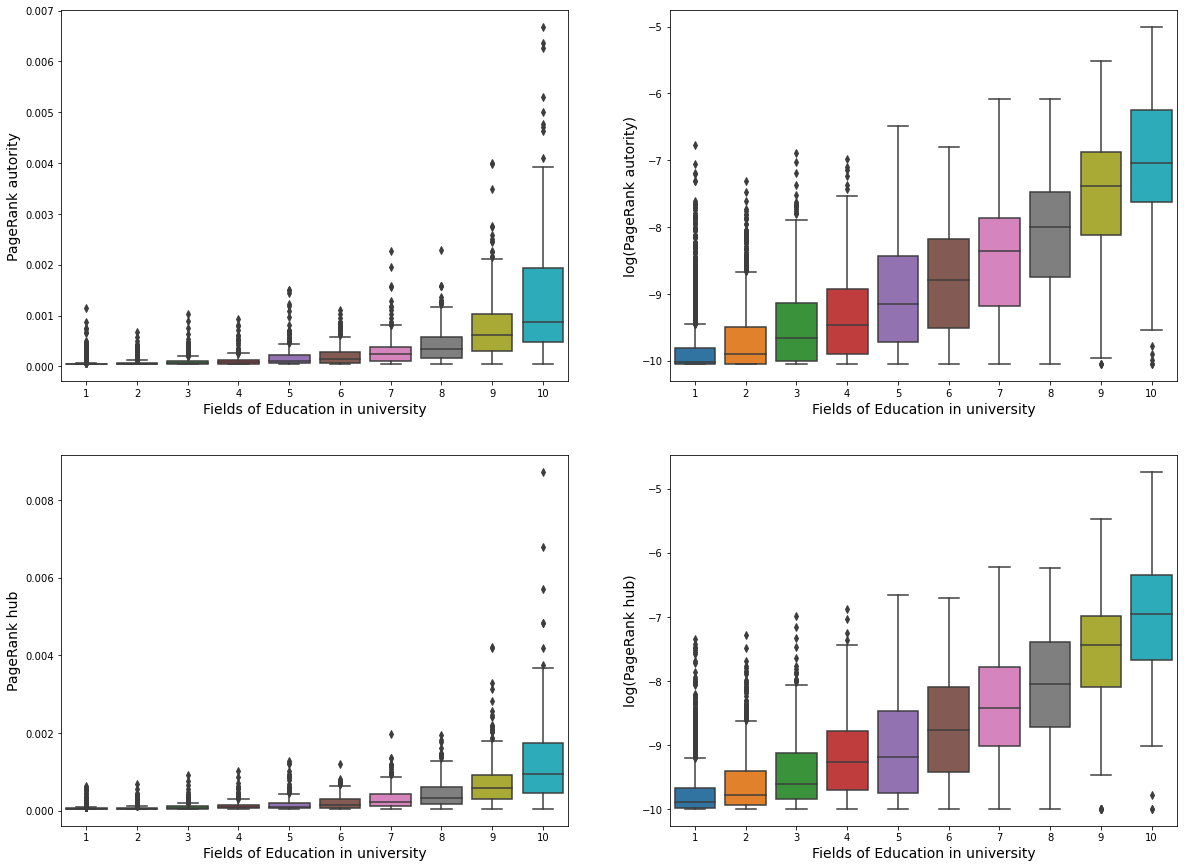

In [42]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))

sns.boxplot(x=scores['N Fields'], y=scores['PageRank autority'], ax=ax[0,0])
ax[0,0].set_xlabel('Fields of Education in university', size=14)
ax[0,0].set_ylabel('PageRank autority', size=14)

sns.boxplot(x=scores['N Fields'], y=np.log(scores['PageRank autority']), ax=ax[0,1])
ax[0,1].set_xlabel('Fields of Education in university', size=14)
ax[0,1].set_ylabel('log(PageRank autority)', size=14)

sns.boxplot(x=scores['N Fields'], y=scores['PageRank hub'], ax=ax[1,0])
ax[1,0].set_xlabel('Fields of Education in university', size=14)
ax[1,0].set_ylabel('PageRank hub', size=14)

sns.boxplot(x=scores['N Fields'], y=np.log(scores['PageRank hub']), ax=ax[1,1])
ax[1,1].set_xlabel('Fields of Education in university', size=14)
ax[1,1].set_ylabel('log(PageRank hub)', size=14)

plt.show()


The centrality of a university seems to be exponential in the number of fields of education present in the university